# Show clustering result after feature extraction

Clustering Algorithm: DBSCAN, a density based clustering algorithm with 2 parameters: epsilon (eps) a density measure, and the minimum number of data points needed to form a cluster (min_samples)

### Optional: Principal component analysis (PCA)

PCA: After feature extraction, each input image is represented using 2048 dimensions. Many researchers propose the reduce the number of dimensions before clustering

## <font color=red>User Input required</font>


In [297]:
outname= "fine_tune_batchsize5_epoch150_Rotated"
feature_path = "/work-ceph/lprasse/siegel/features/"

## Python packages used

In [298]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pickle5 as pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
from sklearn.decomposition import PCA
import os

## Functions defined

In [299]:
def save_as_pickle(obj, filename):
    """
    save an object in a pickle file dump
    :param obj: object to dump
    :param filename: target file
    :return:
    """
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    with open(filename, 'wb') as file:
        pickle.dump(obj, file, protocol=pickle.HIGHEST_PROTOCOL)

def load_pickle(filename):
    """
    load an object from a given pickle file
    :param filename: source file
    :return: loaded object
    """
    with open(filename, 'rb') as file:
        return pickle.load(file)

## Load extracted features and filenames

In [316]:
for i in range(37):
    features = np.array(load_pickle(os.path.join(feature_path, outname, f"train_{i}.pkl")).cpu())
    if i == 0:
        X = features
    else:
        X = np.append(X,features, axis=0)

#X = StandardScaler().fit_transform(X)
print(X.shape)

#"fine_tune_batchsize5_epoch200_Rotated" - eps = 0.027, min_samples=10

(7345, 2048)


In [317]:
filenames = load_pickle(os.path.join(feature_path, outname, "filenames.pkl"))
print(len(filenames))

7345


## Optional: PCA

[0.9735553  0.01126605]
[785.0364   84.44917]


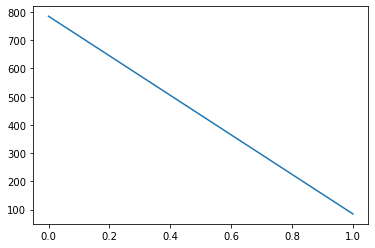

In [318]:
pca = PCA(n_components=2) ## according to guttman kaiser criterion
X = pca.fit_transform(X)

# Use the indicators to select n_components
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

eigenvalue = pca.singular_values_

plt.plot(eigenvalue)

## Compute DBSCAN clusters and print statistics

In [329]:
# Compute DBSCAN
db = DBSCAN(eps=0.03, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 195
Estimated number of noise points: 1987


In [330]:
cluster = zip(labels, filenames)

results = {}

for (label, filename) in cluster:
    if label in results:
        results[label].append(filename)
    else:
        results[label]=[filename]

num_labels = range(-1,(len(results)-1))

for i in num_labels:
    print(f"Cluster {i} contains {len(results[i])} datapoints.")

# Cluster -1 contains the noise points
# Clusters 0-x contain the found clusters

Cluster -1 contains 1987 datapoints.
Cluster 0 contains 4596 datapoints.
Cluster 1 contains 8 datapoints.
Cluster 2 contains 2 datapoints.
Cluster 3 contains 133 datapoints.
Cluster 4 contains 26 datapoints.
Cluster 5 contains 4 datapoints.
Cluster 6 contains 4 datapoints.
Cluster 7 contains 3 datapoints.
Cluster 8 contains 10 datapoints.
Cluster 9 contains 2 datapoints.
Cluster 10 contains 30 datapoints.
Cluster 11 contains 15 datapoints.
Cluster 12 contains 3 datapoints.
Cluster 13 contains 2 datapoints.
Cluster 14 contains 4 datapoints.
Cluster 15 contains 3 datapoints.
Cluster 16 contains 7 datapoints.
Cluster 17 contains 2 datapoints.
Cluster 18 contains 6 datapoints.
Cluster 19 contains 2 datapoints.
Cluster 20 contains 2 datapoints.
Cluster 21 contains 2 datapoints.
Cluster 22 contains 4 datapoints.
Cluster 23 contains 6 datapoints.
Cluster 24 contains 2 datapoints.
Cluster 25 contains 2 datapoints.
Cluster 26 contains 2 datapoints.
Cluster 27 contains 10 datapoints.
Cluster 28 

## Show several images for each cluster

### Noise points

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1169.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1170.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1186.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.119.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1192.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1211.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1215.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1219.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1226.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1227.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1229.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.123.jpg
/work-ceph/lprasse/siegel/data/siegel_gray

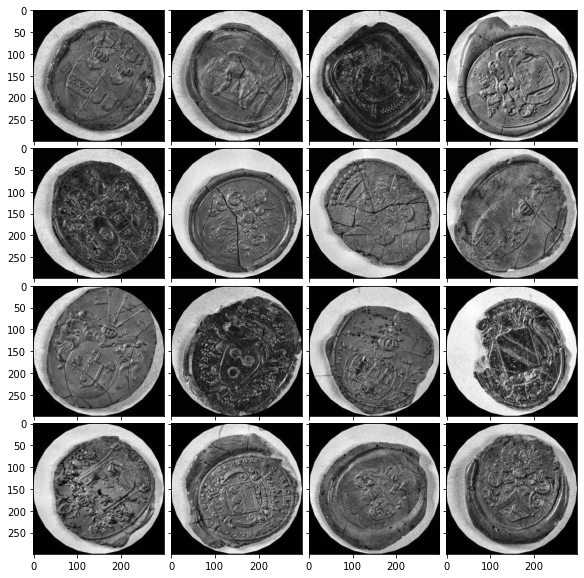

In [305]:
cluster_1 = results[-1]

print_cluster1 = cluster_1[32:48]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

### Clusters 0 - x

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1093.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1094.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1096.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1097.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1098.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.11..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1100.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1101.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1102.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1103.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1104.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1106.jpg
/work-ceph/lprasse/siegel/data/siegel_gra

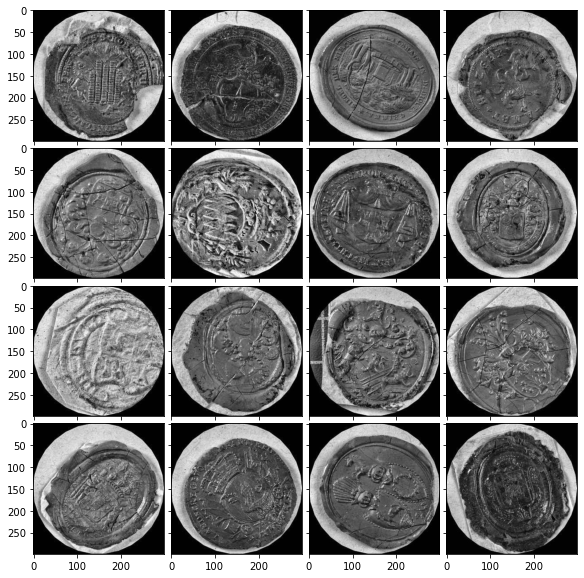

In [306]:
cluster_1 = results[0]

print_cluster1 = cluster_1[32:48]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.07.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1136.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.187.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.194.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.26..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.341.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.488.0.12.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.513.1.09.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.519.0.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.521.1.16.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.547.0.10.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.548.1.07.jpg
/work-ceph/lprasse/s

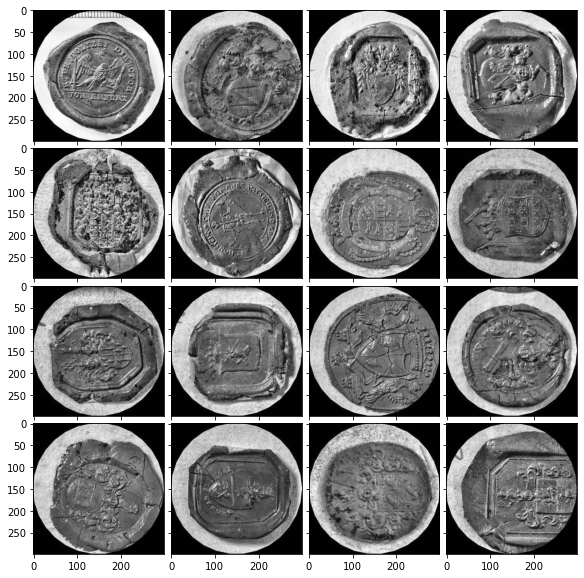

In [307]:
cluster_1 = results[1]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1129.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.186.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.231.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.472.0.49.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.485.0.21.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.500.0.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.539.0.19.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.549.1.14.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.575.0.02.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.583.0.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.583.1.25.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.586.0.04.jpg


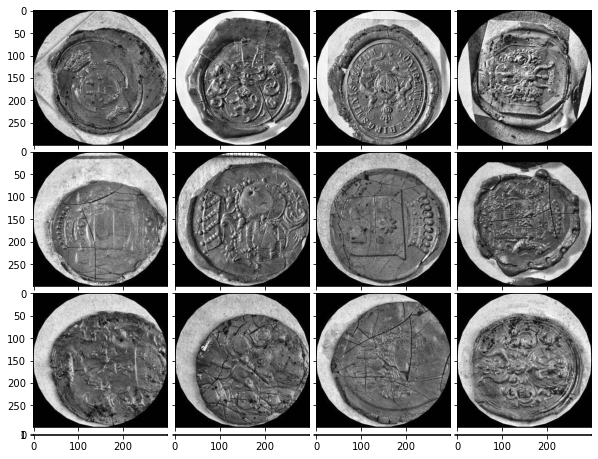

In [308]:
cluster_1 = results[2]

print_cluster1 = cluster_1[0:12]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1228.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.486.0.24.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.525.0.07.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.527.0.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.556.0.23.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.598.1.30.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.611.0.16.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.626.01.19.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.626.02.16.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.627.02.03.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.627.06.02.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.627.3

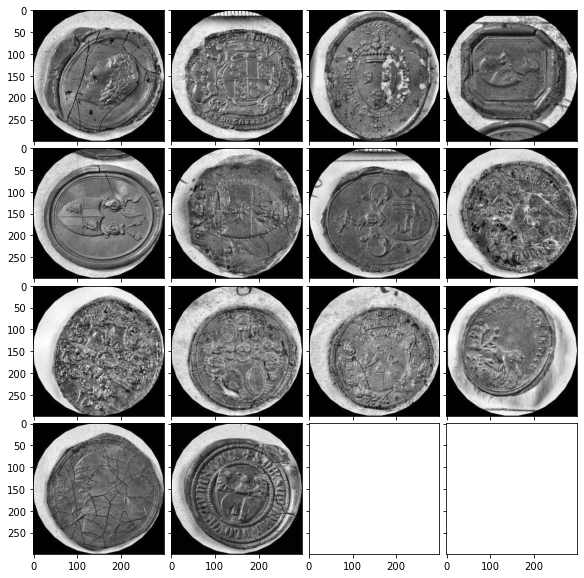

In [309]:
cluster_1 = results[3]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [310]:
cluster_1 = results[4]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

KeyError: 4

In [ ]:
cluster_1 = results[5]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.442.0.15.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.470.0.10.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.505.0.18.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.545.0.10.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.567.0.01.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.598.1.23.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.622.0.03.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.91.jpg


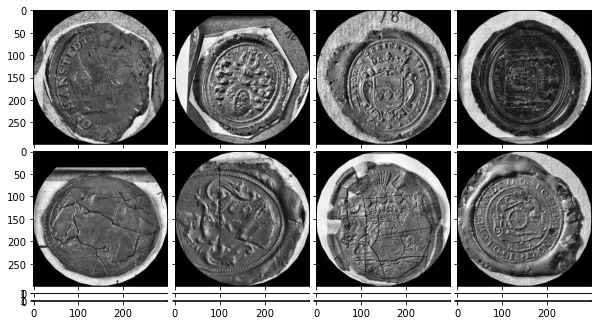

In [232]:
cluster_1 = results[6]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[7]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[8]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[9]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[10]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[11]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[12]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[13]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[14]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[15]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

## Visualize data points and clusters

Text(0.5, 1.0, 'Estimated number of clusters: 8')

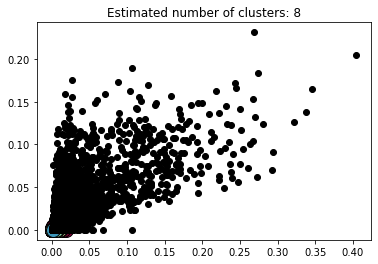

In [233]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)